In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Acessando arquivos


In [7]:
clusters = pd.read_excel('/Users/guilistocco/Documents/TCC 2 - Ônibus/BancoDados/Dados brutos/clusters_18medoids.xlsx')
dict_ = {}
for dic in range((clusters.shape[0])):
    # print(dic)
    dict_[clusters['clusters'][dic]] = clusters['medoids'][dic]
dict_

{0: 5,
 1: 1,
 2: 5,
 3: 5,
 4: 23,
 5: 5,
 6: 6,
 7: 6,
 8: 8,
 9: 9,
 10: 10,
 11: 10,
 12: 15,
 13: 13,
 14: 9,
 15: 15,
 16: 32,
 17: 17,
 18: 18,
 19: 23,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 32,
 25: 17,
 26: 26,
 27: 17,
 28: 31,
 29: 33,
 30: 22,
 31: 31,
 32: 32,
 33: 33,
 34: 33}

In [8]:
viagens_validas = pd.read_excel('/Users/guilistocco/Documents/TCC 2 - Ônibus/BancoDados/Dados brutos/matriz_junho_mapeada.xlsx', index_col='Unnamed: 0')
viagens_validas.columns = ['index_col', 'day', 'device_id', 'periodo', 'dataInicio', 'dataFim',
       'sequence', 'distance(m)', 'duration(s)', 'latitudeI', 'longitudeI',
       'latitudeF', 'longitudeF', 'Nome_PontoI', 'Nome_PontoF', 'PontoFinal',
       'dist_PontoF', 'PontoInicial', 'dist_PontoI']

viagens_validas = viagens_validas[[  'index_col', 'day', 'device_id', 'periodo', 'dataInicio', 'dataFim',
       'sequence', 'distance(m)', 'duration(s)', 'PontoInicial','Nome_PontoI','latitudeI', 'longitudeI','dist_PontoI',
       'PontoFinal','Nome_PontoF','latitudeF', 'longitudeF',  'dist_PontoF'  ]]
viagens_validas['PontoInicial']    = viagens_validas['PontoInicial']    -1
viagens_validas['PontoFinal']      = viagens_validas['PontoFinal']      -1
viagens_validas

,index_col,day,device_id,periodo,dataInicio,dataFim,sequence,distance(m),duration(s),PontoInicial,Nome_PontoI,latitudeI,longitudeI,dist_PontoI,PontoFinal,Nome_PontoF,latitudeF,longitudeF,dist_PontoF
0,None_6,1,0,Manha,2021-06-01 06:44:02,2021-06-01 06:45:20,1,333.068136,78.0,33,Hemocentro / FCM,-22.827145,-47.061214,0.001096,29,Escola Sérgio P. Porto (PONTO INICIAL),-22.829490,-47.060281,0.000124
1,None_6,1,0,Manha,2021-06-01 07:58:17,2021-06-01 07:59:35,4,362.164440,78.0,34,Hemocentro / FCM,-22.827037,-47.061207,0.001011,29,Escola Sérgio P. Porto (PONTO FINAL),-22.829638,-47.060359,0.000179
2,None_6,1,0,Manha,2021-06-01 09:06:10,2021-06-01 09:07:28,6,350.063969,78.0,33,Hemocentro / FCM,-22.827116,-47.061166,0.000957,29,Escola Sérgio P. Porto (PONTO INICIAL),-22.829648,-47.060414,0.000180
3,None_6,1,0,Manha,2021-06-01 11:10:03,2021-06-01 11:11:21,7,361.522224,78.0,34,Hemocentro / FCM,-22.827030,-47.061240,0.001020,29,Escola Sérgio P. Porto (PONTO FINAL),-22.829614,-47.060350,0.000153
4,None_6,1,0,Manha,2021-06-01 11:57:21,2021-06-01 11:58:42,9,339.187065,81.0,33,Hemocentro / FCM,-22.827211,-47.061172,0.000860,29,Escola Sérgio P. Porto (PONTO INICIAL),-22.829681,-47.060513,0.000156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14483,None_8,31,92524,Manha,2021-08-31 12:57:57,2021-08-31 12:59:37,1,527.011253,100.0,13,HC (Portaria F1),-22.829433,-47.064937,0.000081,11,CECOM,-22.825647,-47.066167,0.001011
14484,None_8,31,93049,Tarde,2021-08-31 15:31:56,2021-08-31 15:33:16,1,825.952595,80.0,25,CECOM,-22.826262,-47.067667,0.001754,13,Sobrapar,-22.831246,-47.063677,0.001125
14485,None_8,31,93049,Tarde,2021-08-31 15:31:56,2021-08-31 15:33:16,2,825.952595,80.0,25,CECOM,-22.826262,-47.067667,0.001754,13,Sobrapar,-22.831246,-47.063677,0.001125
14486,None_8,31,93166,Tarde,2021-08-31 16:19:17,2021-08-31 16:23:33,1,821.356800,256.0,13,DGA / Praça das Bandeiras,-22.831021,-47.063912,0.000265,10,CECOM,-22.824985,-47.065243,0.001511


In [9]:
# abrindo arquivos
viagens_validas = pd.read_excel('/Users/guilistocco/Documents/TCC 2 - Ônibus/BancoDados/Dados brutos/matriz_junho_mapeada.xlsx', index_col='Unnamed: 0')

#renomeia colunas
viagens_validas.columns = ['index_col', 'day', 'device_id', 'periodo', 'dataInicio', 'dataFim',
       'sequence', 'distance(m)', 'duration(s)', 'latitudeI', 'longitudeI',
       'latitudeF', 'longitudeF', 'Nome_PontoI', 'Nome_PontoF', 'PontoFinal',
       'dist_PontoF', 'PontoInicial', 'dist_PontoI']

# reordena colunas
viagens_validas = viagens_validas[[  'index_col', 'day', 'device_id', 'periodo', 'dataInicio', 'dataFim',
       'sequence', 'distance(m)', 'duration(s)', 'PontoInicial','Nome_PontoI','latitudeI', 'longitudeI','dist_PontoI',
       'PontoFinal','Nome_PontoF','latitudeF', 'longitudeF',  'dist_PontoF'  ]]

# ajusta numero do ponto ao dicionario de pontos 
viagens_validas['PontoInicial']    = viagens_validas['PontoInicial']    -1
viagens_validas['PontoFinal']      = viagens_validas['PontoFinal']      -1

viagens_validas['NEW_PontoInicial'] = viagens_validas['PontoInicial'].map(dict_)
viagens_validas['NEW_PontoFinal']   = viagens_validas['PontoFinal'].map(dict_)

viagens_validas['NEW_PontoInicial']  = viagens_validas['NEW_PontoInicial'].astype(int) 
viagens_validas['NEW_PontoFinal']    = viagens_validas['NEW_PontoFinal']  .astype(int) 

# Formacao OD

In [10]:
agrupamento = viagens_validas.groupby(['NEW_PontoInicial','NEW_PontoFinal']).agg({'sequence':'count'}).reset_index()

OD = agrupamento.pivot(index= 'NEW_PontoInicial', columns='NEW_PontoFinal', values='sequence').fillna(0)

OD

NEW_PontoFinal,1,5,6,8,9,10,13,15,17,18,20,21,22,23,31,32,33
NEW_PontoInicial,,,,,,,,,,,,,,,,,
1,4.0,125.0,95.0,0.0,64.0,216.0,32.0,67.0,200.0,15.0,154.0,25.0,48.0,207.0,55.0,34.0,2.0
5,12.0,123.0,5.0,0.0,18.0,40.0,1.0,26.0,7.0,10.0,6.0,95.0,380.0,20.0,141.0,0.0,10.0
6,29.0,75.0,4.0,0.0,106.0,91.0,12.0,9.0,42.0,8.0,3.0,12.0,4.0,6.0,160.0,42.0,18.0
8,86.0,5.0,9.0,9.0,7.0,11.0,7.0,10.0,17.0,2.0,19.0,0.0,10.0,19.0,4.0,0.0,22.0
9,15.0,41.0,58.0,0.0,6.0,19.0,7.0,23.0,13.0,6.0,4.0,13.0,18.0,10.0,165.0,16.0,32.0
10,103.0,102.0,73.0,51.0,44.0,33.0,324.0,15.0,688.0,72.0,17.0,16.0,9.0,57.0,94.0,518.0,325.0
13,47.0,19.0,8.0,17.0,8.0,217.0,24.0,6.0,142.0,2.0,0.0,0.0,1.0,1.0,9.0,88.0,207.0
15,29.0,30.0,48.0,0.0,54.0,34.0,20.0,8.0,30.0,3.0,6.0,3.0,10.0,11.0,66.0,2.0,12.0
17,61.0,62.0,21.0,25.0,11.0,772.0,239.0,8.0,148.0,22.0,10.0,6.0,7.0,35.0,52.0,213.0,396.0


# Volumes totais diarios

In [79]:

volumes_totais_diarios = pd.DataFrame(columns = ['Volume'])

for mes in [6,7,8]:

    if mes == 6 :
        looppp = range(1,31)

    else:
        looppp = range(1,32)

    for dia in looppp:
        # print(mes, dia)

        volumes_totais_diarios = pd.concat([volumes_totais_diarios,
            
            pd.DataFrame(data= {'Volume':[viagens_validas.loc[(viagens_validas['dataInicio'].dt.month == mes) & 
                                                            (viagens_validas['dataInicio'].dt.day == dia)].shape[0]]})  ]  ,
                                                            axis = 0, ignore_index = True
                                                            
                                                            )
volumes_totais_diarios.index = pd.date_range('2022-06-01', '2022-08-31')

volumes_totais_diarios.reset_index(inplace=True)
volumes_totais_diarios.columns = ['Data', 'Volume']

## drop volumes vazios
vol_diario = volumes_totais_diarios.loc[volumes_totais_diarios['Volume'] != 0].copy()
volumes_totais_diarios


,Data,Volume
0,2022-06-01,139
1,2022-06-02,290
2,2022-06-03,0
3,2022-06-04,0
4,2022-06-05,0
...,...,...
87,2022-08-27,279
88,2022-08-28,0
89,2022-08-29,0
90,2022-08-30,221


<BarContainer object of 92 artists>

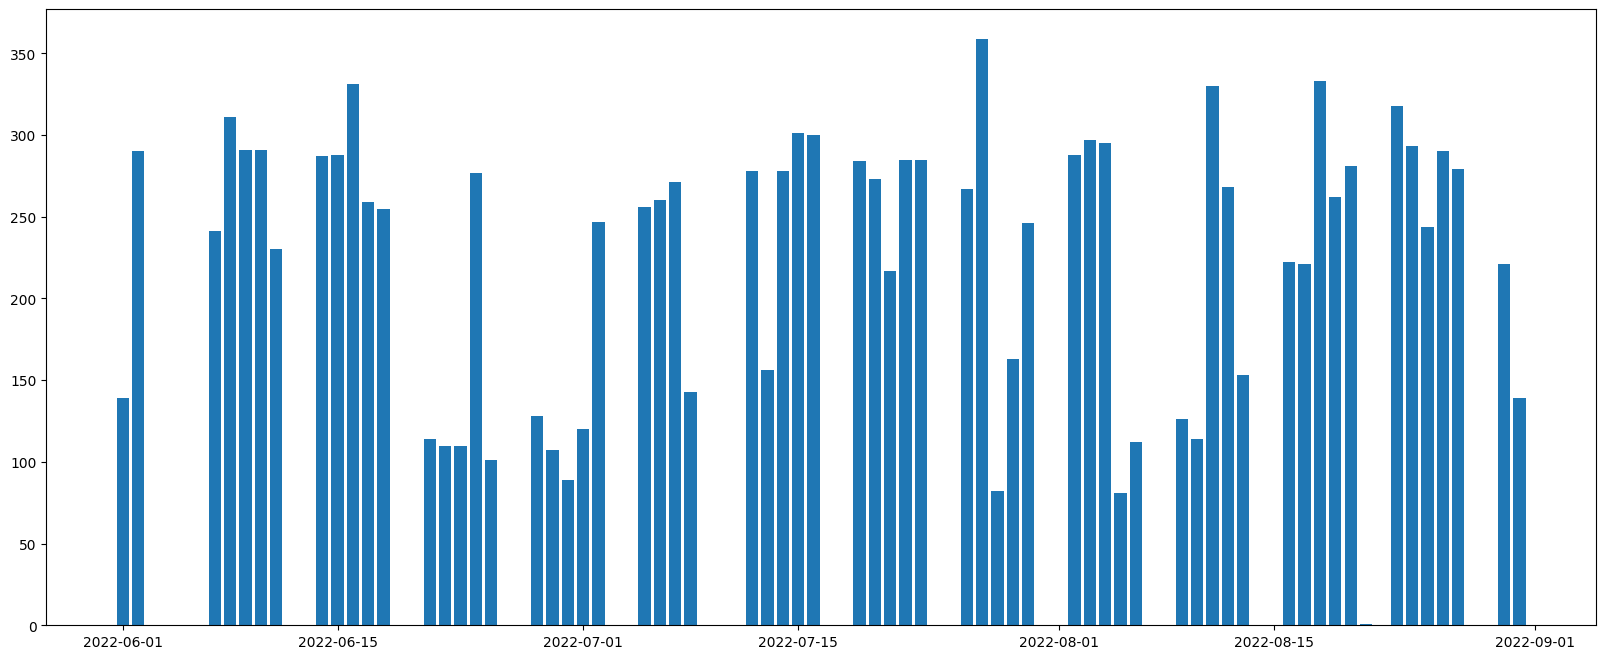

In [80]:
# volumes_totais_diarios['Volume'].plot(kind='bar', figsize = (15,8));
plt.rcParams["figure.figsize"] = (20,8)
plt.bar(volumes_totais_diarios['Data'], volumes_totais_diarios['Volume'])

## Media Movel

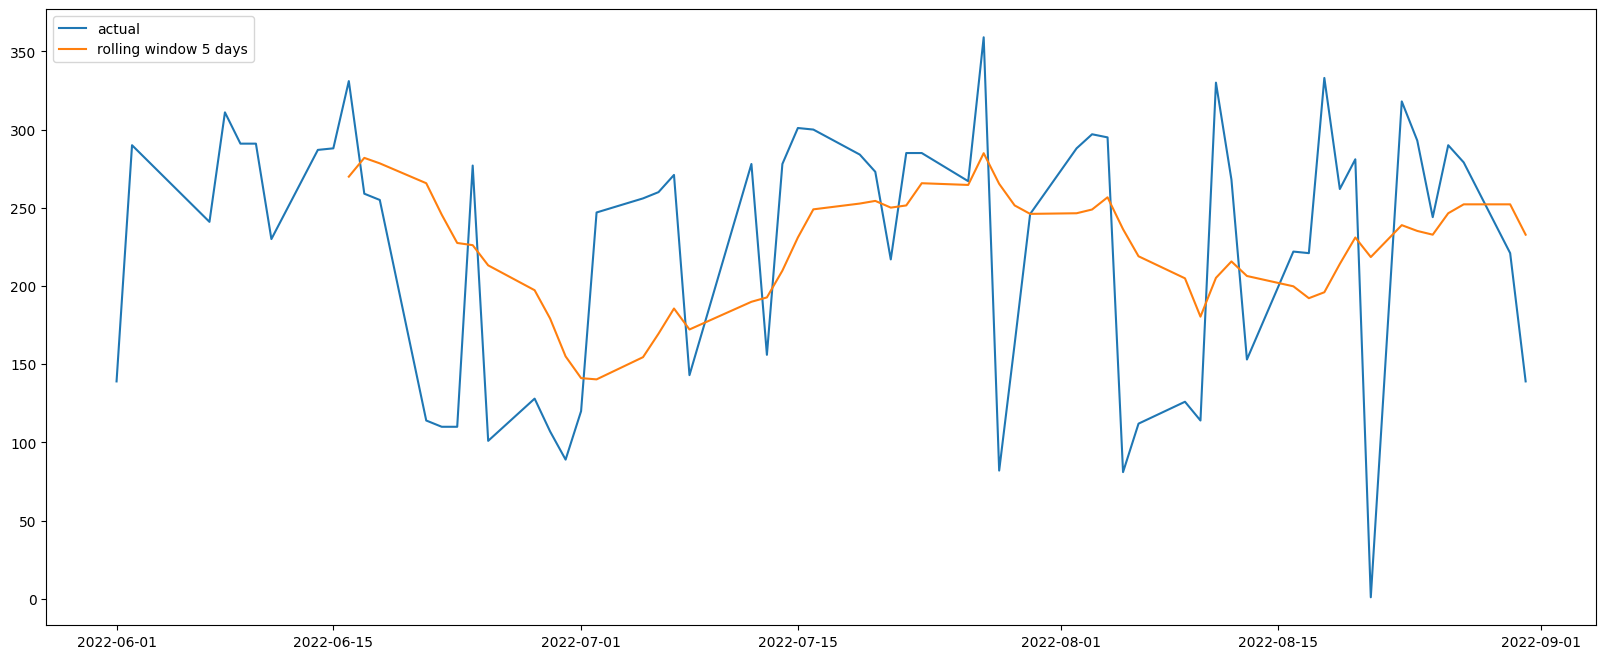

In [95]:
vol_diario['media_movel5'] = vol_diario['Volume'].rolling(5).mean()
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(vol_diario['Data'], vol_diario['Volume'])
plt.plot(vol_diario['Data'], vol_diario['media_movel'])
plt.legend(loc = 'upper left', labels = ['actual', 'rolling window 5 days'])

plt.show()

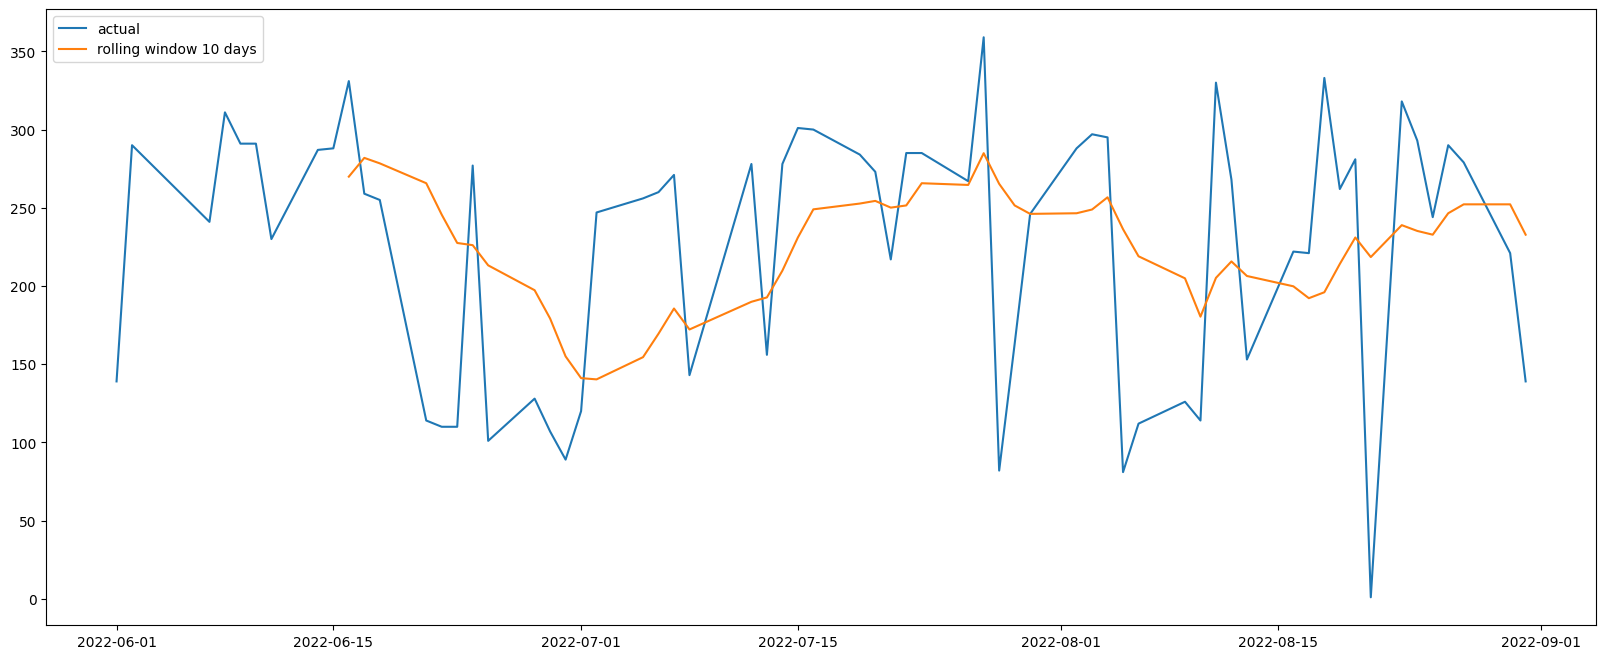

In [96]:
vol_diario['media_movel10'] = vol_diario['Volume'].rolling(10).mean()
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(vol_diario['Data'], vol_diario['Volume'])
plt.plot(vol_diario['Data'], vol_diario['media_movel'])
plt.legend(loc = 'upper left', labels = ['actual', 'rolling window 10 days'])


plt.show()

### calculo do erro

In [100]:
vol_diario['erro5'] = (vol_diario['media_movel5'] - vol_diario['Volume'])**2
print( 'erro quadratico soma   ',vol_diario['erro5'].sum())
print( 'erro quadratico medio   ',vol_diario['erro5'].mean())

erro quadratico soma    326001.24
erro quadratico medio    5433.354


In [98]:
vol_diario

,Data,Volume,media_movel,media_movel5,media_movel10,erro5
0,2022-06-01,139,NaN,NaN,NaN,NaN
1,2022-06-02,290,NaN,NaN,NaN,NaN
6,2022-06-07,241,NaN,NaN,NaN,NaN
7,2022-06-08,311,NaN,NaN,NaN,NaN
8,2022-06-09,291,NaN,254.4,NaN,1339.56
...,...,...,...,...,...,...
85,2022-08-25,244,232.8,227.4,232.8,275.56
86,2022-08-26,290,246.5,229.2,246.5,3696.64
87,2022-08-27,279,252.2,284.8,252.2,33.64
90,2022-08-30,221,252.2,265.4,252.2,1971.36


## Suavizacao Exponencial


In [101]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


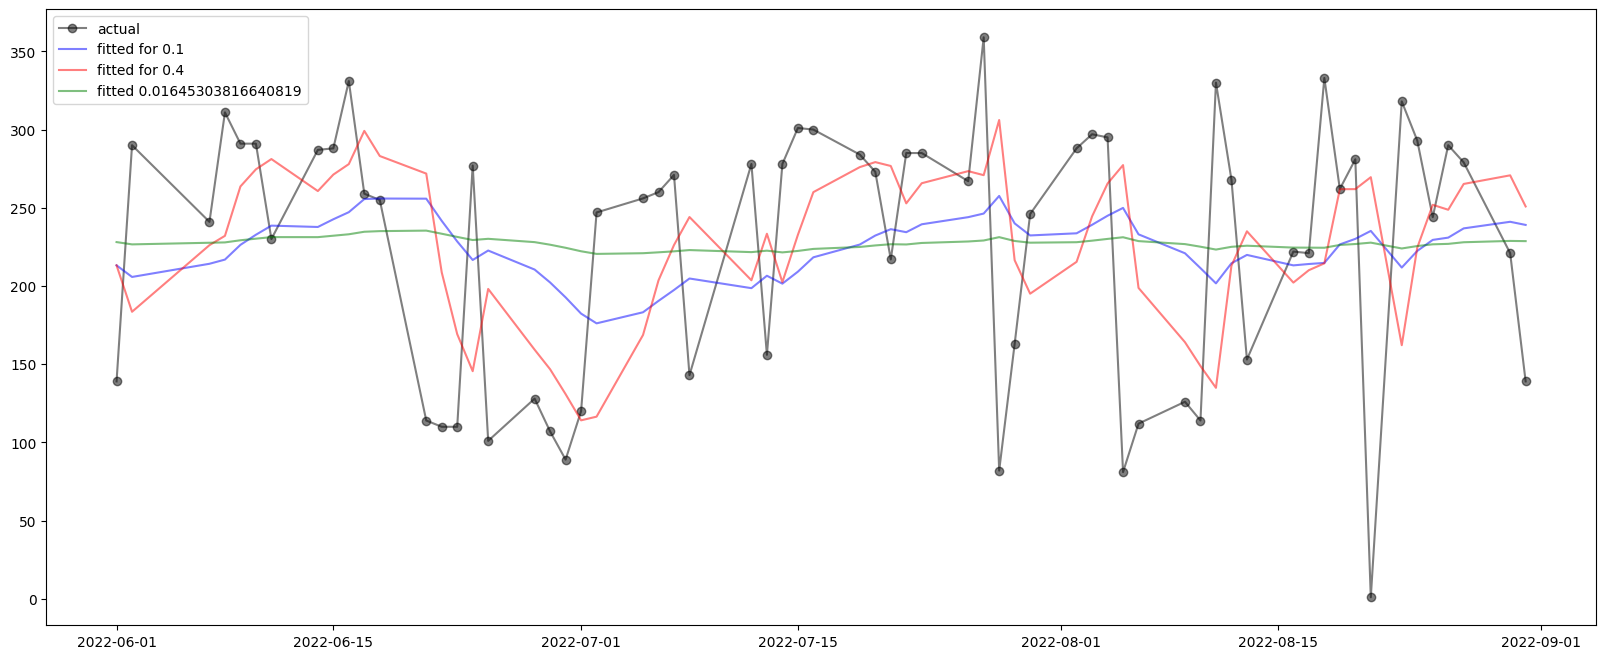

In [161]:


fit1 = SimpleExpSmoothing(vol_diario['Volume'].values, initialization_method="heuristic").fit(smoothing_level=0.1, optimized=False)

fit2 = SimpleExpSmoothing(vol_diario['Volume'].values, initialization_method="heuristic").fit(smoothing_level=0.4, optimized=False)

fit3 = SimpleExpSmoothing(vol_diario['Volume'].values, initialization_method="estimated").fit(optimized=True)

vol_diario['fitted1_values'] = fit1.fittedvalues
vol_diario['fitted2_values'] = fit2.fittedvalues
vol_diario['fitted3_values'] = fit3.fittedvalues


plt.figure(figsize=(20, 8))
plt.plot(vol_diario['Data'],vol_diario['Volume'], marker="o", color="black", alpha = 0.5)
plt.plot(vol_diario['Data'],fit1.fittedvalues, color="blue", alpha = 0.5)
plt.plot(vol_diario['Data'],fit2.fittedvalues, color="red" , alpha = 0.5)
plt.plot(vol_diario['Data'],fit3.fittedvalues, color="green", alpha = 0.5)

plt.legend(loc = 'upper left', labels = ['actual', 'fitted for 0.1', 'fitted for 0.4', 'fitted {}'.format(fit3.model.params["smoothing_level"])])


### calculo do erro

In [162]:
vol_diario['error1'] = abs(vol_diario['Volume'] - vol_diario['fitted1_values'])
vol_diario['error2'] = abs(vol_diario['Volume'] - vol_diario['fitted2_values'])
vol_diario['error3'] = abs(vol_diario['Volume'] - vol_diario['fitted3_values'])

print( 'erro absoluto medio   ',vol_diario['error1'].mean())
print( 'erro absoluto medio   ',vol_diario['error2'].mean())
print( 'erro absoluto medio   ',vol_diario['error3'].mean())


erro absoluto medio    72.12609959868378
erro absoluto medio    66.09149647333419
erro absoluto medio    70.92195318516806


0 0 0.6 AxesSubplot(0.125,0.53;0.352273x0.35)
0 1 0.4 AxesSubplot(0.547727,0.53;0.352273x0.35)
1 0 0.1 AxesSubplot(0.125,0.11;0.352273x0.35)
1 1 0.01645303816640819 AxesSubplot(0.547727,0.11;0.352273x0.35)


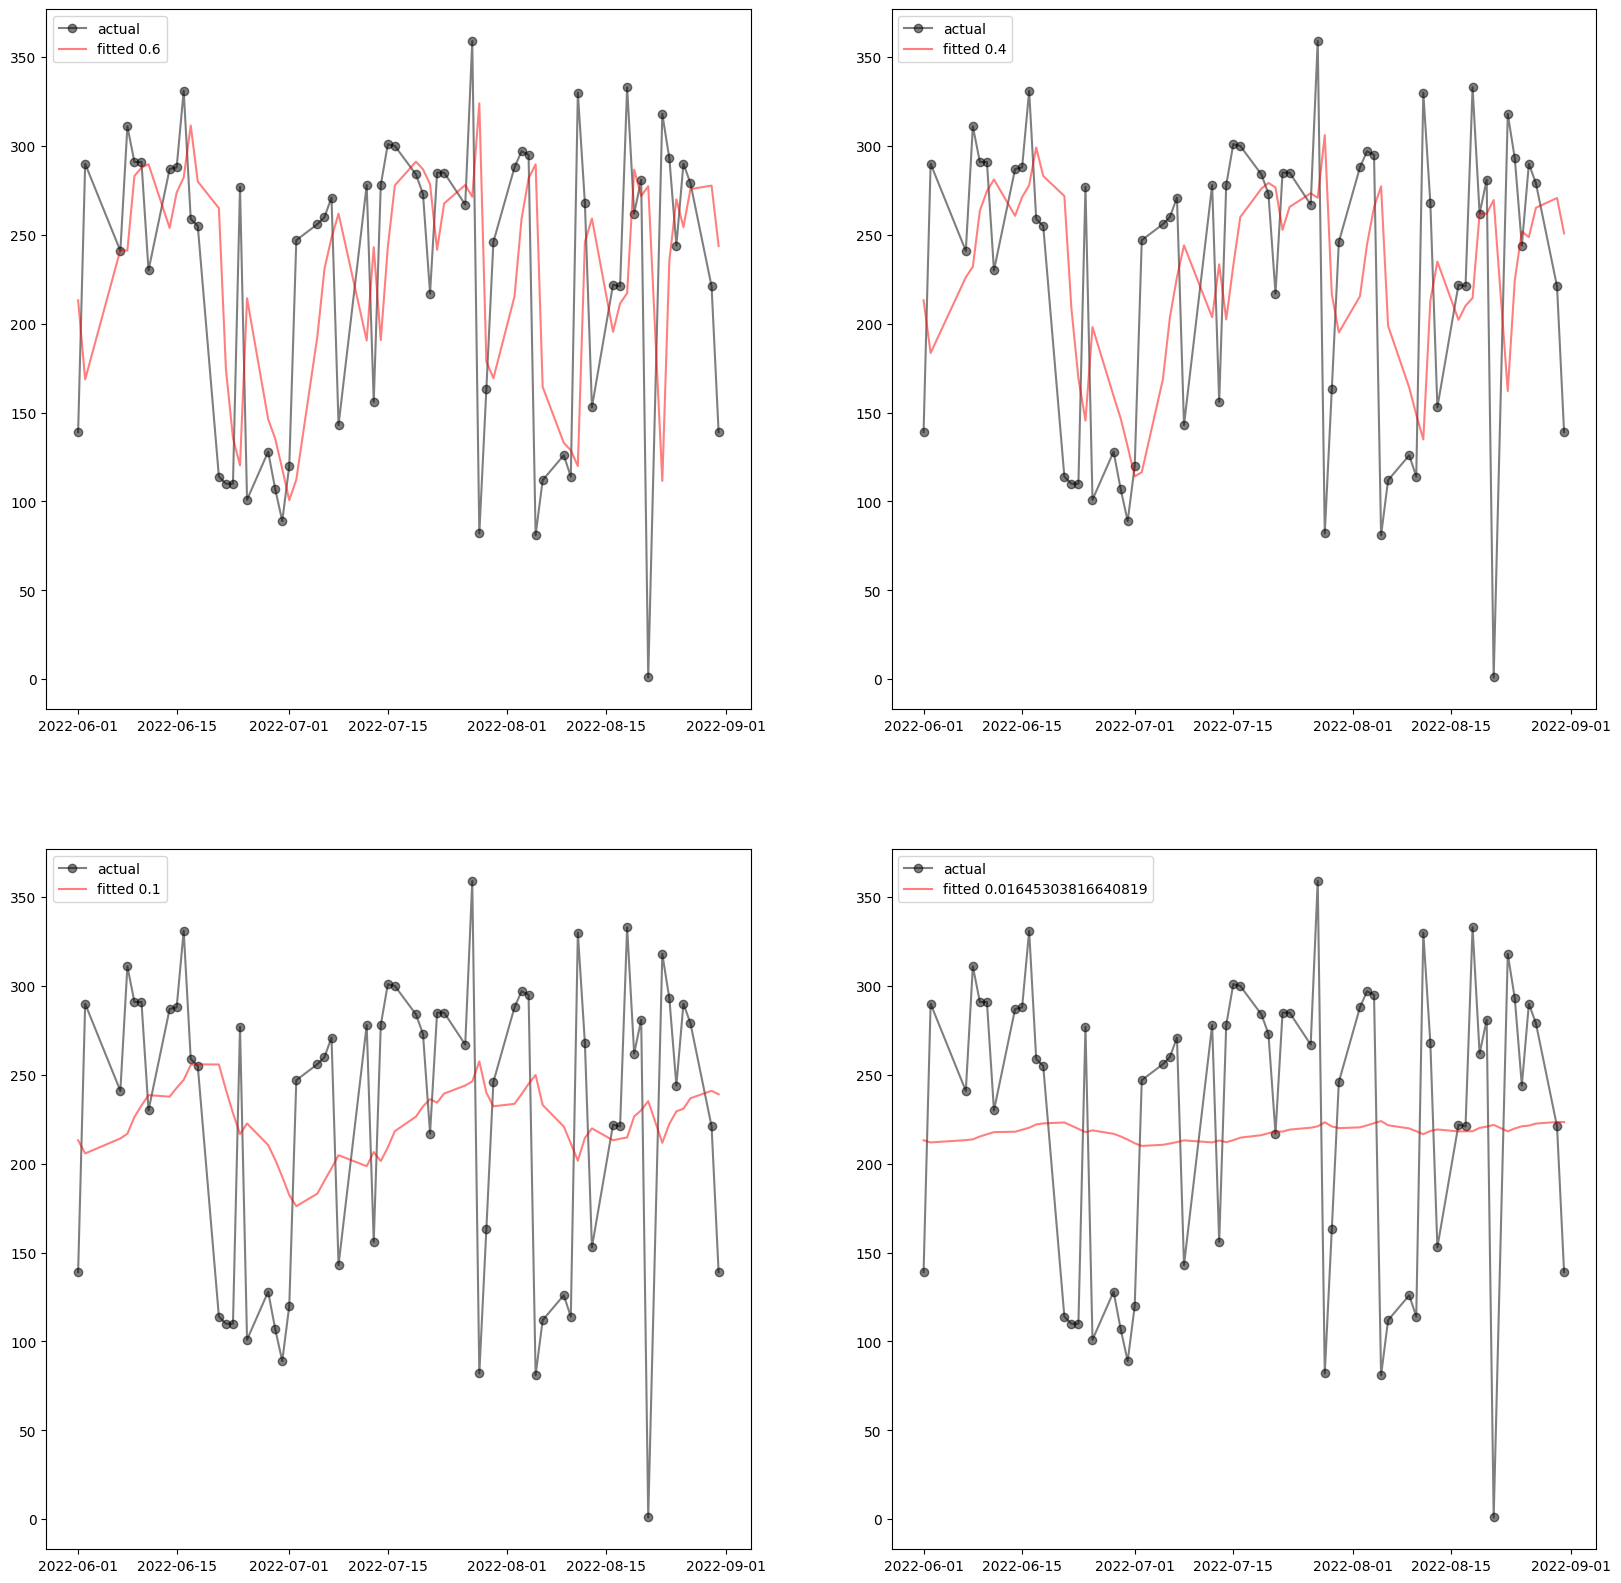

In [124]:
fig, ax = plt.subplots(ncols=2, nrows=2,figsize=(20, 20) )


params = [0.6,0.4, 0.1,fit3.model.params["smoothing_level"] ]
i = 0
for row in range(0,2):
    for col in range(0,2):

        fit1 = SimpleExpSmoothing(vol_diario['Volume'].values, initialization_method="heuristic").fit(smoothing_level=params[i], optimized=False)
        # print(row, col,params[i], ax[row][col])

        ax[row][col].plot(vol_diario['Data'],vol_diario['Volume'], marker="o", color="black", alpha = 0.5)
        ax[row][col].plot(vol_diario['Data'],fit1.fittedvalues, color="red", alpha = 0.5)
        ax[row][col].legend(loc = 'upper left', labels = ['actual', 'fitted {}'.format(params[i])])


        i +=1

plt.show()



In [155]:
# SimpleExpSmoothing(vol_diario['Volume'].values, initialization_method="heuristic").score( np.ndarray(1))



NotImplementedError: 

## Metodo de Holt

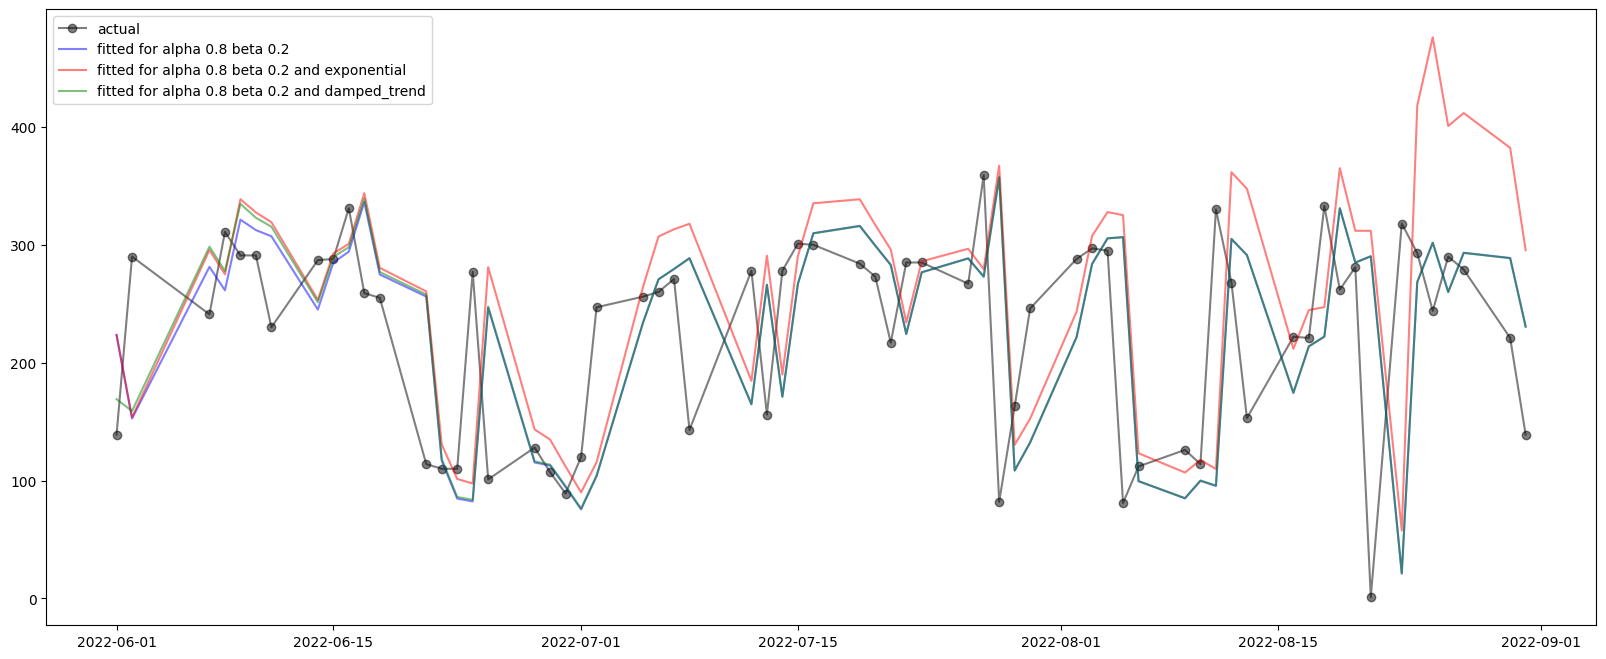

In [143]:
fit1 = Holt(vol_diario['Volume'].values, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)

fit2 = Holt(vol_diario['Volume'].values, exponential=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)

fit3 = Holt(vol_diario['Volume'].values, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)


plt.figure(figsize=(20, 8))
plt.plot(vol_diario['Data'],vol_diario['Volume'].values, marker="o", color="black", alpha = 0.5)
plt.plot(vol_diario['Data'],fit1.fittedvalues, color="blue", alpha = 0.5)
plt.plot(vol_diario['Data'],fit2.fittedvalues, color="red", alpha = 0.5)
plt.plot(vol_diario['Data'],fit3.fittedvalues, color="green", alpha = 0.5)

plt.legend(loc = 'upper left', labels = ['actual', 
                                'fitted for alpha 0.8 beta 0.2', 
                                'fitted for alpha 0.8 beta 0.2 and exponential', 
                                'fitted for alpha 0.8 beta 0.2 and damped_trend'])



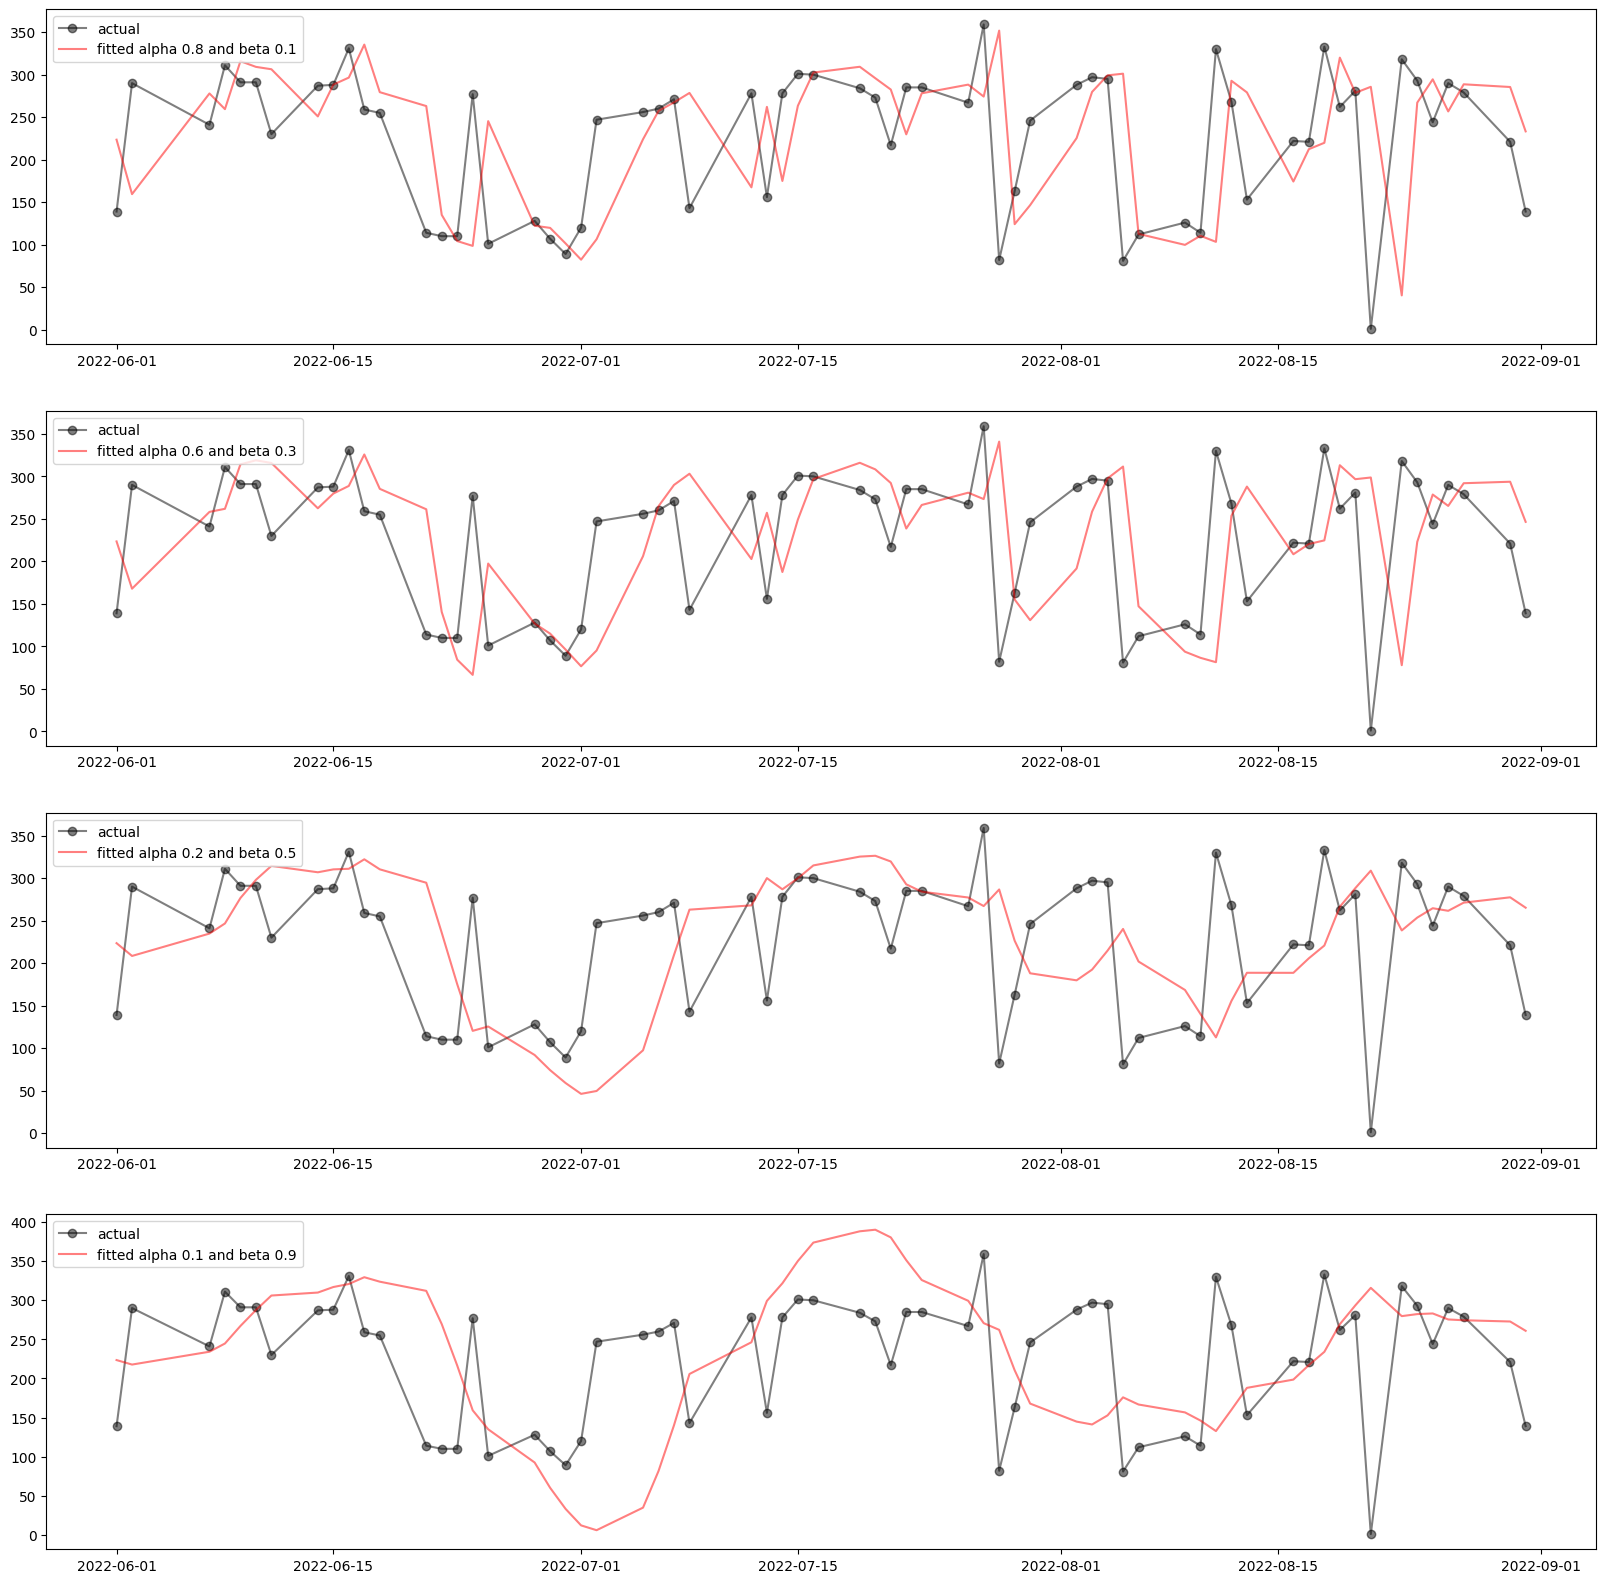

In [145]:
fig, ax = plt.subplots(ncols=1, nrows=4,figsize=(20, 20) )

params_alpha = [0.8,0.6,0.2, 0.1]
params_beta = [0.1,0.3,0.5, 0.9]
i = 0
for row in range(0,4):

    fit1 = Holt(vol_diario['Volume'].values, initialization_method="estimated").fit(smoothing_level=params_alpha[i], smoothing_trend=params_beta[i], optimized=False)
    # print(row, col,params[i], ax[row][col])

    ax[row].plot(vol_diario['Data'],vol_diario['Volume'], marker="o", color="black", alpha = 0.5)
    ax[row].plot(vol_diario['Data'],fit1.fittedvalues, color="red", alpha = 0.5)
    ax[row].legend(loc = 'upper left', labels = ['actual', 'fitted alpha {} and beta {}'.format(params_alpha[i], params_beta[i])])


    i +=1

plt.show()

